In [1]:
import odl
import matplotlib.pyplot as plt
import numpy as np
from fbrct import *
from examples.settings import *
from fbrct.util import *

In [2]:
fname = '/export/scratch1/adriaan/MatlabProjects/DynamicTomography/astra_scripts' \
    f'/fluidized_bed_1_python_2.mat'
p, pref, (T, nr_detectors, det_height, det_count) = load_dataset(fname)

apart, dpart = uniform_angle_partition(), detector_partition_2d()
geometry = odl.tomo.FanFlatGeometry(apart, dpart, SOURCE_RADIUS, DETECTOR_RADIUS)

recon_height = 773  # height of the slice to reconstruct, in pixels

n = 250  # amount of voxels in one dimension (i.e. nxn object)
L = 10  # centimeters  -L cm to L cm in the physical space

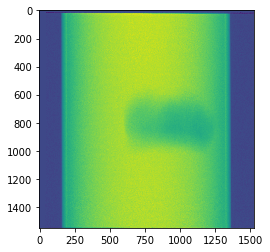

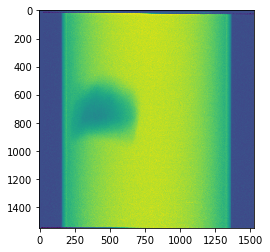

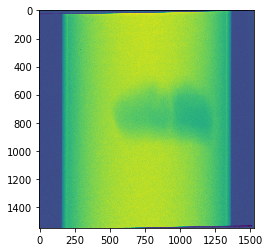

In [29]:
for i in range(3):
    plt.figure()
    plt.imshow(p[22,i,...])
    plt.show()

In [4]:
# We're building the linear X-Ray operator that artificially projects
# the bubble reactor onto the detector
reco_space = odl.uniform_discr(
    min_pt=[-L, -L],
    max_pt=[L, L],
    shape=[n, n])
xray_transform = odl.tomo.RayTransform(reco_space, geometry)

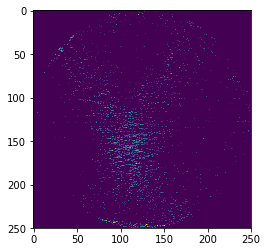

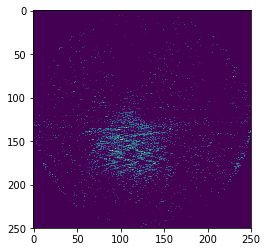

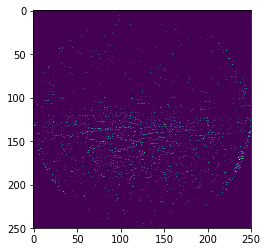

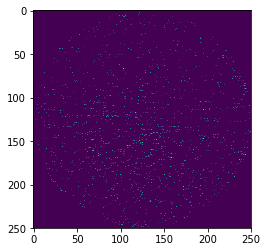

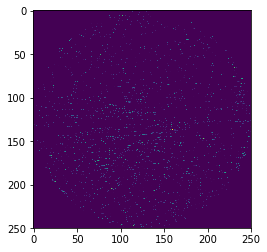

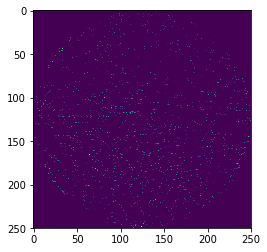

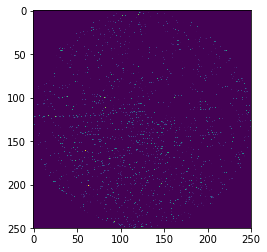

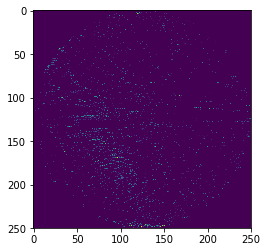

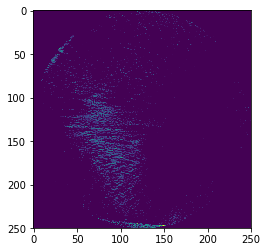

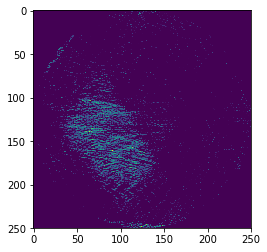

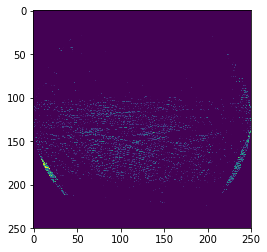

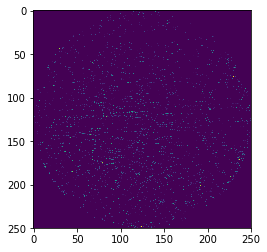

In [5]:
recon_start_timeframe = 13
recon_end_timeframe = 25 

for t in range(recon_start_timeframe, recon_end_timeframe):
    # take and scale the projection data
    sinogram = -(p[t, :, recon_height, :] - pref[:, recon_height, :])

    # reconstruct iteratively
    # starting vector is 0 in iteration
    x = xray_transform.domain.element(
        np.zeros(xray_transform.domain.shape))

    reconstruct_filter(
        xray_transform,
        sinogram,
        x,
        niter=300,
        clip=(0, None),  # clipping values
        # fn_filter=lambda u: .1 * medians_2d(u) + .9 * u,  # median filter
        mask=circle_mask_2d(x.shape))

    # plot results
    plt.figure(2)
    plt.imshow(x)
    plt.pause(.1)